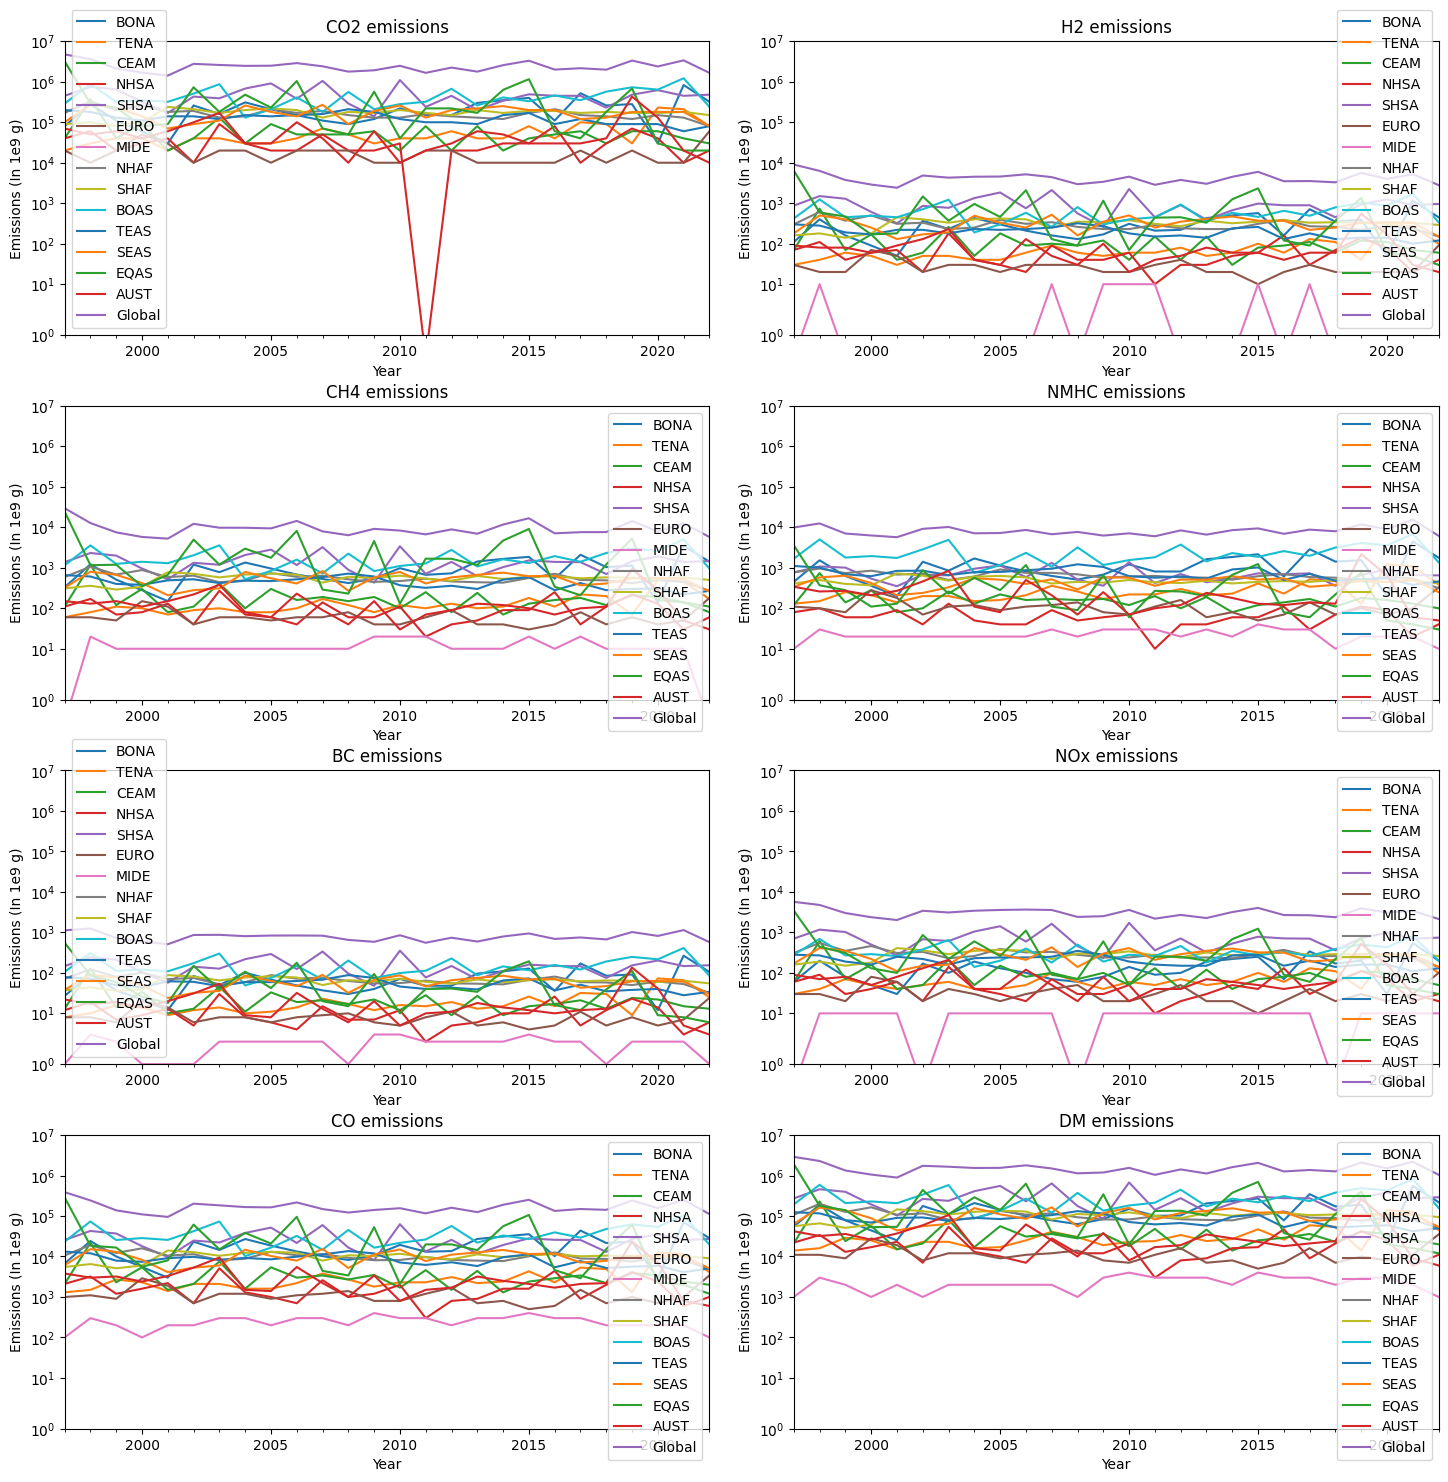

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gases = ['CO2.txt', 'CH4.txt', 'BC.txt', 'CO.txt', 'H2.txt', 'NMHC.txt', 'NOx.txt', 'DM.txt']
extra_emissions = ['CO2_SAVA.txt', 'CH4_SAVA.txt', 'BC_SAVA.txt', 'CO_SAVA.txt', 'H2_SAVA.txt', 'NMHC_SAVA.txt', 'NOx_SAVA.txt', 'DM_SAVA.txt']
rates = {'CO2.txt' : 10000, 'CH4.txt': 10, 'BC.txt' : 1, 'CO.txt' : 100, 'H2.txt' : 10, 'NMHC.txt' : 10, 'NOx.txt': 10, 'DM.txt' : 1000}
dataframes = {}

for i in range(len(gases)):
    # read from CO2.csv with tab as delimiter and trim all spaces
    df = pd.read_csv(gases[i], delimiter=' ', skipinitialspace=True)
    df.drop(df.columns[[27, 28]], axis=1, inplace=True)
    del df['Unnamed: 29']

    #convert rows to columns
    df = df.transpose()
    df.rename(columns=df.iloc[0], inplace=True)
    df.drop(df.index[0], inplace=True)
    df.reset_index(inplace=True)
    df.rename(columns={'index':'Year'}, inplace=True)
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)
    df = df.astype(float)

    # read from CO2.csv with tab as delimiter and trim all spaces
    extras_df = pd.read_csv(extra_emissions[i], delimiter=' ', skipinitialspace=True)
    extras_df.drop(extras_df.columns[[27, 28]], axis=1, inplace=True)
    del extras_df['Unnamed: 29']

    #convert rows to columns
    extras_df = extras_df.transpose()
    extras_df.rename(columns=extras_df.iloc[0], inplace=True)
    extras_df.drop(extras_df.index[0], inplace=True)
    extras_df.reset_index(inplace=True)
    extras_df.rename(columns={'index':'Year'}, inplace=True)
    extras_df['Year'] = pd.to_datetime(extras_df['Year'], format='%Y')
    extras_df.set_index('Year', inplace=True)
    # extras_df = extras_df.astype(float)

    df = df - extras_df
    df = df * rates[gases[i]]
    dataframes[gases[i]] = df

#plot the data
#create 4*2 subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.tight_layout(pad=3.0)
# labels = ['BONA', 'TENA', 'CEAM', 'NHSA', 'SHSA', 'EURO', 'MIDE', 'NHAF', 'SHAF', 'BOAS', 'TEAS', 'SEAS', 'EQAS', 'AUST', 'Global']
# lines = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.'] 
# fig.legend(lines, labels, loc = 'upper center', ncol=2)
for i in range(len(gases)):
    gas_name = gases[i].split('.')[0] + ' emissions'
    j = i % 4
    k = i // 4
    dataframes[gases[i]].plot(ax=axes[j][k] ,title=gas_name)
    axes[j][k].set_ylabel('Emissions (In 1e9 g)')
    axes[j][k].set_xlabel('Year')
    axes[j][k].set_yscale('symlog')
    axes[j][k].set_ylim(1, 1e7)
    # axes[j][k].legend().set_visible(False)
plt.show()




/tmp/ipykernel_7609/3654322524.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_y = predicted_y.append(pd.Series(y_pred[j], index=[pd.to_datetime('2023-01-01') + pd.DateOffset(years=j)]))
/tmp/ipykernel_7609/3654322524.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_y = predicted_y.append(pd.Series(y_pred[j], index=[pd.to_datetime('2023-01-01') + pd.DateOffset(years=j)]))
/tmp/ipykernel_7609/3654322524.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_y = predicted_y.append(pd.Series(y_pred[j], index=[pd.to_datetime('2023-01-01') + pd.DateOffset(years=j)]))
/tmp/ipykernel_7609/3654322524.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas 

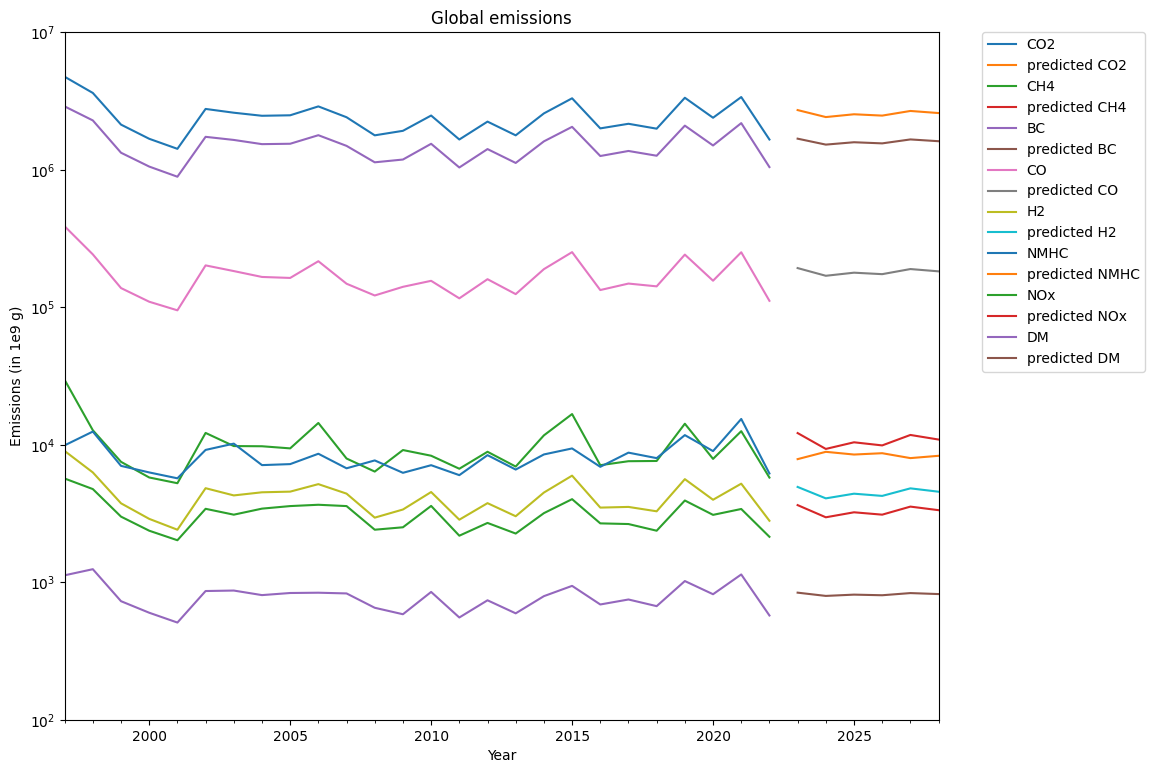

/tmp/ipykernel_7609/3654322524.py:45: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_y = predicted_y.append(pd.Series(y_pred[j], index=[pd.to_datetime('2023-01-01') + pd.DateOffset(years=j)]))
/tmp/ipykernel_7609/3654322524.py:45: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_y = predicted_y.append(pd.Series(y_pred[j], index=[pd.to_datetime('2023-01-01') + pd.DateOffset(years=j)]))
/tmp/ipykernel_7609/3654322524.py:45: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_y = predicted_y.append(pd.Series(y_pred[j], index=[pd.to_datetime('2023-01-01') + pd.DateOffset(years=j)]))
/tmp/ipykernel_7609/3654322524.py:45: FutureWarning: The series.append method is deprecated and will be removed from pandas 

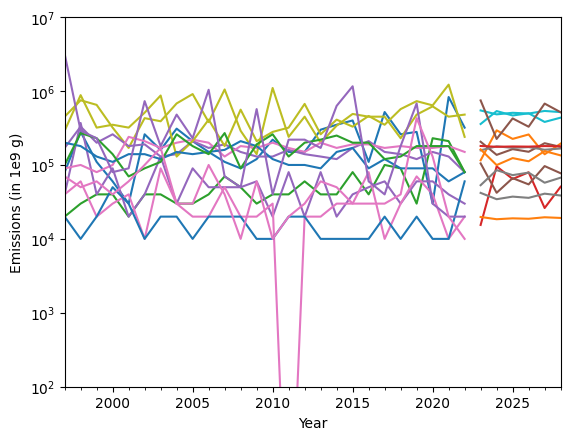

In [7]:
#linear regression on the data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
fig.tight_layout(pad=3.0)
for i in range(len(gases)):
    X_train, X_test, y_train, y_test = train_test_split(dataframes[gases[i]].index.values.reshape(-1, 1), dataframes[gases[i]]['Global'], test_size=0.2, random_state=0)
    model = make_pipeline(PolynomialFeatures(2), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_test = pd.DataFrame(y_test)
    predicted_y = dataframes[gases[i]]['Global'].copy()
    predicted_y.drop(predicted_y.index, inplace=True)
    for j in range(len(y_pred)):
        predicted_y = predicted_y.append(pd.Series(y_pred[j], index=[pd.to_datetime('2023-01-01') + pd.DateOffset(years=j)]))

    # plot all gases on the same graph
    gas_name = gases[i].split('.')[0]
    dataframes[gases[i]]['Global'].plot(ax=axes, label=gas_name)
    predicted_y.plot(ax=axes, title='Global emissions', label='predicted '  + gas_name)
# add legend outside plot
axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.yscale('symlog')
plt.ylim(100, 10000000)
plt.ylabel('Emissions (in 1e9 g)')
plt.show()

